![Astrofisica Computacional](../logo.PNG)

---

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp



def geodesics(tau, x, M=1.):
    '''
    This function contains the geodesic equations in Hamiltonian form 
    for the Schwarzschild metric.
    Momentum compontens use lower indices
    '''
    # Coordinates and momentum components
    t = x[0]
    r = x[1]
    theta = x[2]
    phi = x[3]
    pt = x[4]
    pr = x[5]
    pth = x[6]
    pphi = x[7]

    # Conserved Quantities
    E = - pt
    L = pphi

    # Geodesics differential equations 
    dtdtau = E*r**2./(r**2 - 2.*M*r)
    drdtau = (1. - 2.*M/r)*pr
    dthdtau = pth/r**2
    dphidtau = L/((r**2)*np.sin(theta)**2)
    
    dptdtau = 0.
    dprdtau = -M*(pr**2/r**2) + pth**2/r**3 + L**2/((r**3)*np.sin(theta)**2) - M*(E**2/(r-2.*M)**2) 
    dpthdtau = (np.cos(theta)/np.sin(theta)**3)*(L**2/r**2)
    dpphidtau = 0.
    

    dxdtau = [dtdtau, drdtau, dthdtau, dphidtau, 
              dptdtau, dprdtau, dpthdtau, dpphidtau]
    return dxdtau


def initCond(t0, r0, th0, phi0, pth0, energy, angmomentum, M=1.):
    '''
    This function prepares the initial values of coordinates and momentum to
    solve the geodesic equations.
    
    Input    
    x: initial coordinates 
    energy 
    angmumentum
    pth: initial momentum component in the theta direction
    Returns
    [t, r, theta, phi, p_t, p_r, p_theta, p_phi] :initial conditions needed to solve 
    the geodesic equations (with covariant components of the momentum vector)
    '''
    
    # momentum components
    p_t0 = - energy
    p_r0 = 0.
    p_th0 = pth0
    p_phi0 = angmomentum
    
    return [t0, r0, th0, phi0, p_t0, p_r0, p_th0, p_phi0]


Energy: 0.962962962962963


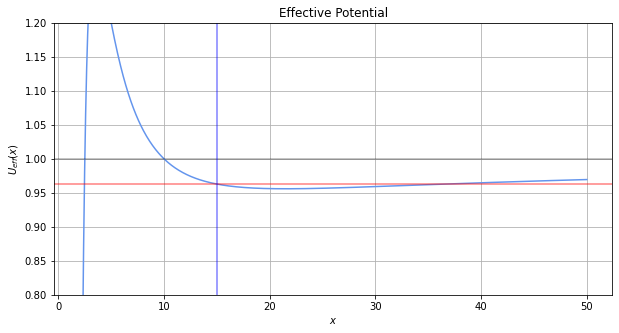

In [8]:


def Veff(r, L, M=1.):
    '''
    Effective Potential
    '''
    return (1 - 2*M/r)*(1 + L**2/r**2)



# Mass of the central object
M = 1.

# Initial condition at one of the apsis
r0 = 15.
p_r0 = 0.

th0 = np.pi/2
p_th0 = 0.

phi0 = 0.

angmomentum = 5.
energy = Veff(r0, L=angmomentum, M=M)
print('Energy:',energy)

p_t0 = - energy
p_phi0 = angmomentum
    
x0 = [0., r0, th0, phi0, p_t0, p_r0, p_th0, p_phi0]


rrange = np.linspace(2,50,1000)
plt.figure(figsize=(10,5))
plt.plot(rrange, Veff(rrange, L=angmomentum, M=M), color='cornflowerblue')

plt.axhline(1, color = 'black', alpha=0.3)
plt.axhline(energy, color = 'red', alpha=0.5)
plt.axvline(r0, color = 'blue', alpha=0.5)

plt.title('Effective Potential')
plt.xlabel(r'$x$')
plt.ylabel(r'$U_{eff}(x)$')
plt.grid()
plt.ylim(0.8,1.2)

plt.show()
    

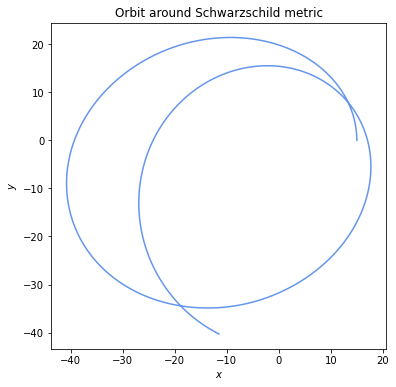

In [10]:
tau_i = 0.
tau_f = 1500.
n = 10000

sol = solve_ivp(geodesics, [tau_i, tau_f], x0, t_eval = np.linspace(tau_i, tau_f,n))

#Cartesian Coodinates Solution
solx = sol.y[1]*np.cos(sol.y[3])
soly = sol.y[1]*np.sin(sol.y[3])


plt.figure(figsize=(6,6))
plt.plot(solx, soly, color='cornflowerblue')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Orbit around Schwarzschild metric')
plt.show()

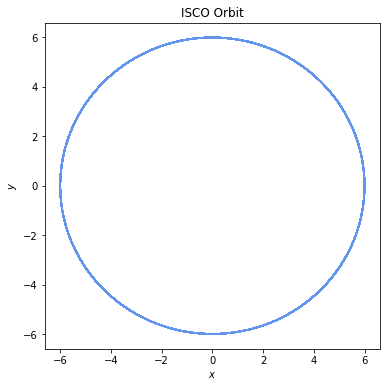

In [36]:
# ISCO

# Mass of the central object
M = 1.

# Initial condition at the ISCO
r0 = 6.
p_r0 = 0.

th0 = np.pi/2
p_th0 = 0.

phi0 = 0.

angmomentum = M*np.sqrt(12)
energy = np.sqrt(8./9.
                )
p_t0 = - energy
p_phi0 = angmomentum
    
x0 = [0., r0, th0, phi0, p_t0, p_r0, p_th0, p_phi0]




tau_i = 0.
tau_f = 5000.
n = 10000



sol = solve_ivp(geodesics, [tau_i, tau_f], x0, t_eval = np.linspace(tau_i, tau_f,n))

#Cartesian Coodinates Solution
solx = sol.y[1]*np.cos(sol.y[3])
soly = sol.y[1]*np.sin(sol.y[3])


plt.figure(figsize=(6,6))
plt.plot(solx, soly, color='cornflowerblue')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'ISCO Orbit')
plt.show()